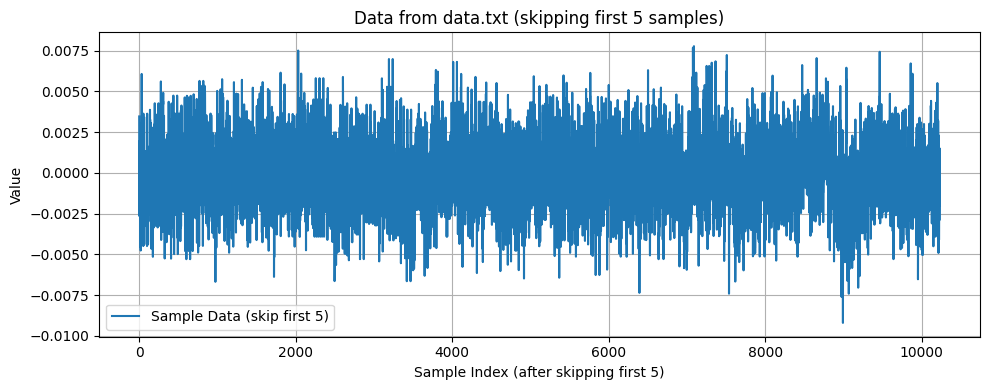

In [4]:
import matplotlib.pyplot as plt

# 파일에서 데이터 읽기
data_file = 'data.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

# 초기 5개 값 무시
data_to_plot = data[5:]

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(data_to_plot, label='Sample Data (skip first 5)')
plt.xlabel('Sample Index (after skipping first 5)')
plt.ylabel('Value')
plt.title('Data from data.txt (skipping first 5 samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


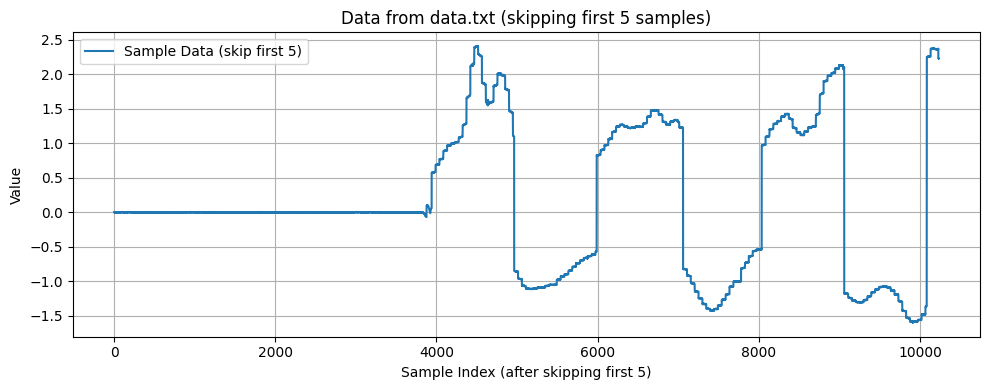

In [5]:
import matplotlib.pyplot as plt

# 파일에서 데이터 읽기
data_file = 'data1.txt'
data = []

with open(data_file, 'r') as f:
    for line in f:
        try:
            value = float(line.strip())
            data.append(value)
        except ValueError:
            continue  # 혹시 숫자가 아닌 줄이 있을 경우 무시

# 초기 5개 값 무시
data_to_plot = data[5:]

# 그래프 그리기
plt.figure(figsize=(10, 4))
plt.plot(data_to_plot, label='Sample Data (skip first 5)')
plt.xlabel('Sample Index (after skipping first 5)')
plt.ylabel('Value')
plt.title('Data from data.txt (skipping first 5 samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
